## Описание проекта

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.  
## Данные
airports_nearest — расстояние до ближайшего аэропорта в метрах (м);  
balcony — число балконов;  
ceiling_height — высота потолков (м);  
cityCenters_nearest — расстояние до центра города (м);  
days_exposition — сколько дней было размещено объявление (от публикации до снятия);  
first_day_exposition — дата публикации;  
floor — этаж;  
floors_total — всего этажей в доме;  
is_apartment — апартаменты (булев тип);  
kitchen_area — площадь кухни в квадратных метрах (м²);  
last_price — цена на момент снятия с публикации;  
living_area — жилая площадь в квадратных метрах (м²);  
locality_name — название населённого пункта;  
open_plan — свободная планировка (булев тип);  
parks_around3000 — число парков в радиусе 3 км;  
parks_nearest — расстояние до ближайшего парка (м);  
ponds_around3000 — число водоёмов в радиусе 3 км;  
ponds_nearest — расстояние до ближайшего водоёма (м);  
rooms — число комнат;  
studio — квартира-студия (булев тип);  
total_area — общая площадь квартиры в квадратных метрах (м²);  
total_images — число фотографий квартиры в объявлении.

## 1. Открываем файл с данными и изучаем общую информацию. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


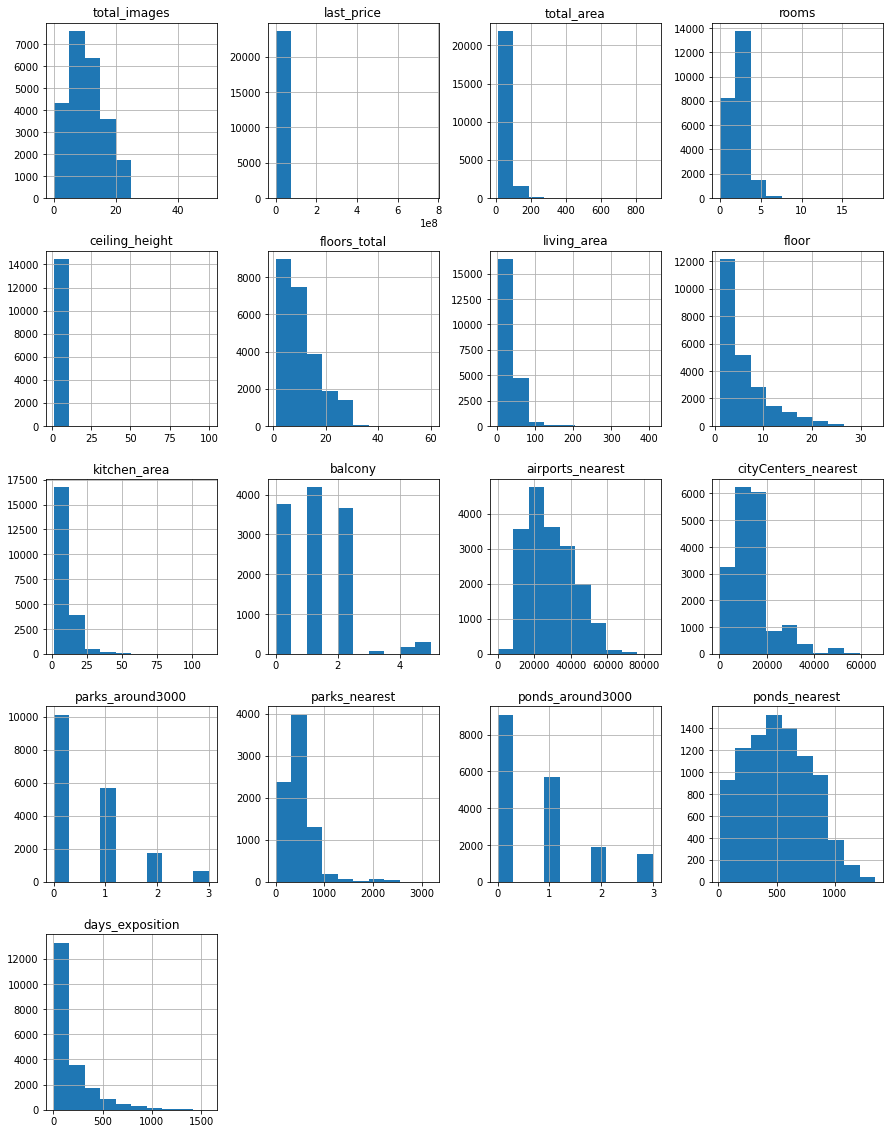

In [ ]:
import pandas as pd
import math
import re
import matplotlib
import matplotlib.pyplot as plt
import warnings #вызываем библиоткеку
warnings.filterwarnings('ignore') #отключаем предупреждения
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') # открываем файл
data.info() #  получаем информацию о файле
display(data.head(10)) # выводим первые 10 строк data
data.hist(figsize=(15, 20)); # строим гистограммы по data

## 2.Предобработка данных

In [ ]:
print(data.isna().sum()) # ищем пропущенные значения
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm') # выводим % пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**Видим следующие пропуски в данных по столбцам, вероятные причины:**  
ceiling_height - продавца не считает обязательной информацию по высоте потолков  
floors_total - продавец не указал информацию  
living_area - самый значимый параметр при размещении, очевидно ошибка при выгрузке  
is_apartment - булевое значение, соответственно Nan = 0  
kitchen_area - площадь кухни не указана, возможно это студия  
balcony - в квартире балкона нет  
locality_name - ошибка при выгрузке, без указания населеннного пункта невожможно разместить объявление  
airports_nearest - расстояние до аэропорта значительное  
cityCenters_nearest - расстояние до центра значительное  
parks_around3000 - в радиусе 3 км нет парков  
parks_nearest - парк находится на значительном расстоянии  
ponds_around3000 - в радиусе 3 км нет водоемов  
ponds_nearest - водоем находится на значительном расстоянии  
days_exposition - объявление еще не снято с ресурса 

In [ ]:
# работаем с данными:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'}) # приводим к единому стилю названия столбцов
# заполняем пропущенные значения, где это явно можно сделать:
data['is_apartment'] = data['is_apartment'].fillna(0) # булевое значение Nan = 0
data['balcony'] = data['balcony'].fillna(0) # балконы не указаны = 0
data['parks_around3000'] = data['parks_around3000'].fillna(0) # парки в пределах 3 км отсутствуют = 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(0) # водоемы в пределах 3 км отсутствуют = 0
data = data.dropna(subset=['locality_name']) # удаляем пропущенные населенные пункты
# заполняем высоту потолков по району:
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality_name), 'ceiling_height'] = median
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
# заполняем пропущенные расстояния до центра в зависимости от населенного пункта
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'city_centers_nearest'].median()
    data.loc[(data['city_centers_nearest'].isna()) & (data['locality_name'] == locality_name), 'city_centers_nearest'] = median
data.isna().sum() # проверяем результат замен

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5386
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

In [ ]:
data.info() # проверяем типы данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Видим следующие типы данных:**  
0   total_images - int64 - целые числа, для количества корректно  
1   last_price - float64 - дробные числа, в принципе корректно, но для удобства можно преобразовать в int 
2   total_area - float64 - дробные числа, для общей площади корректно  
3   first_day_exposition - object - для даты и времени должен быть datatime, **некорректно**  
4   rooms - int64 - целые числа, для количества комнат корректно  
5   ceiling_height - float64 - дробные числа, для высоты потолков корректно  
6   floors_total - float64 - дробные числа, количество этажей может быть только целым числом **некорректно**, корректно - int  
7   living_area - float64 - дробные числа, для площади корректно  
8   floor - int64 - целые числа, для номера этажа корректно  
9   is_apartment - object - должен принимать значения True или False, верный bool, **некорректно**  
10  studio - bool - булев тип, корректно  
11  open_plan - ool - булев тип, корректно  
12  kitchen_area - float64 - дробные числа, корректно  
13  balcony - float64 - дробные числа, количество балконов может быть только целым числом, **некорректно**, корректно - int  
14  locality_name - object - **некорректно**, для строк должен быть тип str  
15  airports_nearest - float64 - дробные числа, корректно, но такая точность ни к чему  
16  cityCenters_nearest - float64 - дробные числа, корректно, но такая точность ни к чему  
17  parks_around3000 - float64 - дробные числа, количество парков может быть только целым числом, **некорректно**, корректно - int  
18  parks_nearest - float64 - дробные числа, корректно, но такая точность ни к чему  
19  ponds_around3000 - float64 - дробные числа, количество прудов может быть только целым числом, **некорректно**, корректно - int  
20  ponds_nearest - float64 - дробные числа, корректно, но такая точность ни к чему  
21  days_exposition - float64 - дробные числа, количество дней может быть только целым числом, **некорректно**, корректно - int

In [ ]:
# преобразование типов данных
data['is_apartment'] = data['is_apartment'].astype(int) # преобразуем в целое
data['balcony'] = data['balcony'].astype(int) # преобразуем в целое
data['parks_around3000'] = data['parks_around3000'].astype(int) # преобразуем в целое
data['ponds_around3000'] = data['ponds_around3000'].astype(int) # преобразуем в целое
data['last_price'] = data['last_price'].astype(int) # преобразуем в целое * добавил строчку
data['locality_name'] = data['locality_name'].astype(str) # преобразуем в строку

In [ ]:
print(data['locality_name'].unique()) # смотрим на уникальные значения по столбцу locality_name

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е') # заменяем ё на е

In [ ]:
# убираем аномалию из столбца locality_name
data['locality_name_short'] = data['locality_name'].str.replace('поселок', '').str.replace('городского типа', '').str.replace('деревня', '').str.replace('садовое товарищество', '').str.replace('городской', '').str.replace('село', '').str.strip()

       total_images    last_price    total_area         rooms  ceiling_height  \
count  23650.000000  2.365000e+04  23650.000000  23650.000000    23650.000000   
mean       9.862326  6.541127e+06     60.329069      2.070106        2.733775   
std        5.682278  1.089640e+07     35.661808      1.078620        1.010372   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.550000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.700000   
75%       14.000000  6.799000e+06     69.700000      3.000000        2.700000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  is_apartment  kitchen_area  \
count  23565.000000  21752.000000  23650.000000  23650.000000  21381.000000   
mean      10.675875     34.448356      5.893277      0.002114     10.566403   
std        6.594823     22.037664

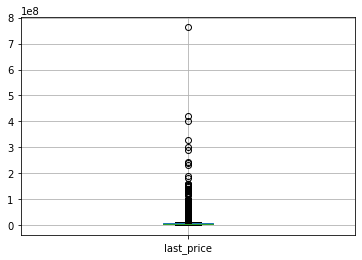

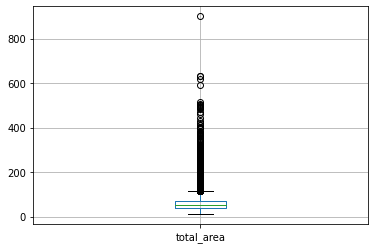

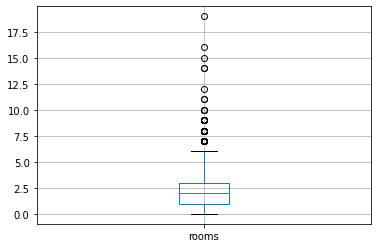

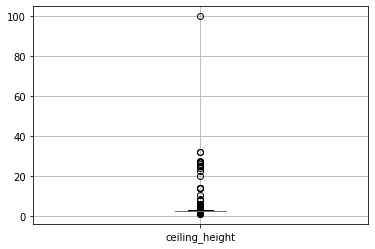

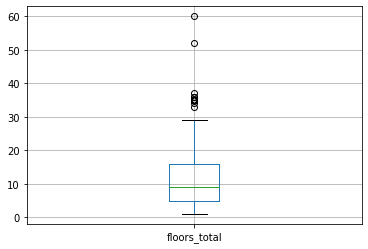

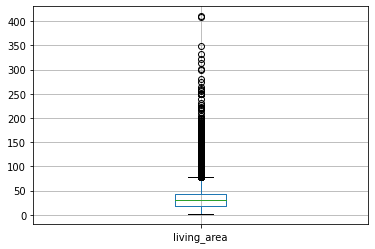

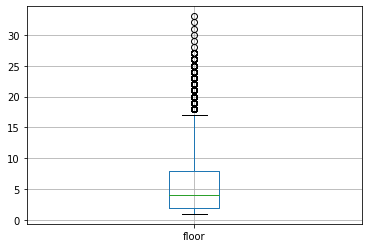

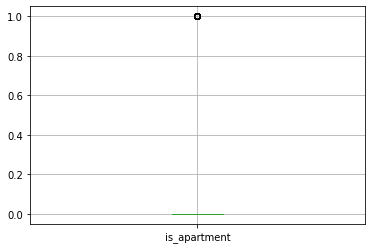

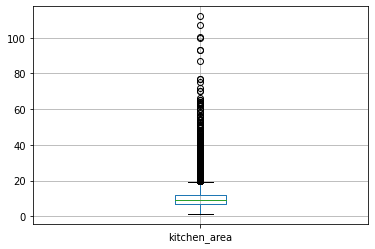

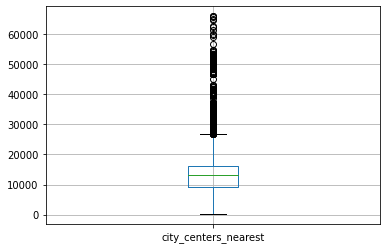

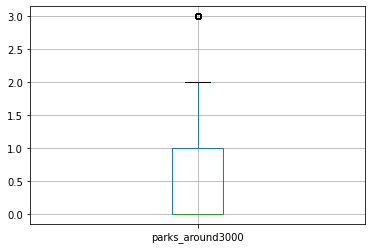

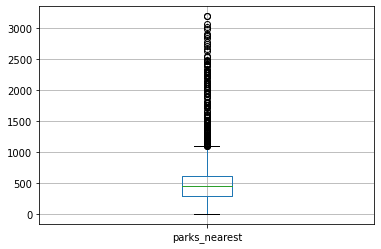

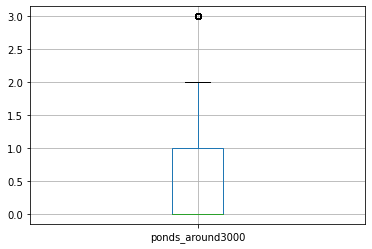

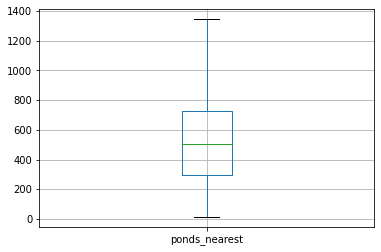

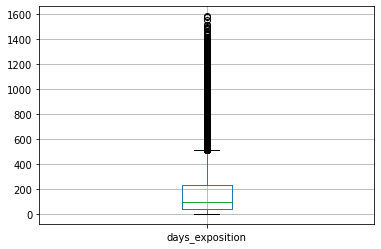

In [ ]:
# работаем с аномалиями
print(data.describe())
data.boxplot(column=['last_price'])
plt.show()
data.boxplot(column=['total_area'])
plt.show()
data.boxplot(column=['rooms'])
plt.show()
data.boxplot(column=['ceiling_height'])
plt.show()
data.boxplot(column=['floors_total'])
plt.show()
data.boxplot(column=['living_area'])
plt.show()
data.boxplot(column=['floor'])
plt.show()
data.boxplot(column=['is_apartment'])
plt.show()
data.boxplot(column=['kitchen_area'])
plt.show()
data.boxplot(column=['city_centers_nearest'])
plt.show()
data.boxplot(column=['parks_around3000'])
plt.show()
data.boxplot(column=['parks_nearest'])
plt.show()
data.boxplot(column=['ponds_around3000'])
plt.show()
data.boxplot(column=['ponds_nearest'])
plt.show()
data.boxplot(column=['days_exposition'])
plt.show()

Аномалия прослеживается:  
**ceiling_height**, минимальная высота 1 м, максимальная 100 м.  
**kitchen_area**, минимальная площадь 1,3 м2  
**living_area**, минимальная площадь 2 м2

In [ ]:
print('Явных дубликатов:', data.duplicated().sum()) # проверяем на наличие явные дубликатов
data = data.drop_duplicates() # удаляем явные дубликаты
# замена медианным значением высоты потолков пределах нормальных значений (меньше 2,4 м и выше 3,5 м.)
data.loc[data['ceiling_height'] < 2.4] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] > 3.5] = data['ceiling_height'].median()
# замена медианным значением площади кухни меньше 5 м. По нормам меньше 5 м2 кухни быть не может.
data.loc[data['kitchen_area'] < 5] = data['kitchen_area'].median()
# замена медианным значением площади квартир\апартаментов меньше 11 м.
data.loc[data['living_area'] < 11] = data['living_area'].median()

Явных дубликатов: 0


**Вывод:**
Для более корректных результатов выполнили замены на медианы по потолкам, площадям кухонь и недвижимости.  
Поскольку на диаграммах размаха видно наличие выбросов. При применении средного значения эти выбросы значительно будут влиять на результат.

In [ ]:
# добавляем столбцы:
data['price_m2'] = data['last_price'] / data['total_area'] # добавляем столбец "Цена 1 м2" price_m2
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S', errors = 'coerce') # преобразуем в дату
data['weekday_publication'] = data['first_day_exposition'].dt.weekday # добавляем столбец "День недели" week_day
data['month_publication'] = data['first_day_exposition'].dt.month # добавляем столбец "Месяц публикации" month_publication
data['year_publication'] = data['first_day_exposition'].dt.year # добавляем столбец "Год публикации" year_publication
# добавляем столбец "Тип этажа квартиры" floor_type:
def type_floor(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
data['floor_type'] = data.apply(type_floor, axis = 1)
# добавляем столбец "Расстояние до центра в км" city_сenters_nearest_km
data['city_сenters_nearest_km'] = round(data['city_centers_nearest'] / 1000, 0)
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0          20.0  13000000.0       108.0           2019-03-07    3.0   
1           7.0   3350000.0        40.4           2018-12-04    1.0   
2          10.0   5196000.0        56.0           2015-08-20    2.0   
3           0.0  64900000.0       159.0           2015-07-24    3.0   
4           2.0  10000000.0       100.0           2018-06-19    2.0   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70          16.0         51.0    8.0           0.0  ...   
1            2.63          11.0         18.6    1.0           0.0  ...   
2            2.70           5.0         34.3    4.0           0.0  ...   
3            2.70          14.0          NaN    9.0           0.0  ...   
4            3.03          14.0         32.0   13.0           0.0  ...   

  ponds_around3000 ponds_nearest  days_exposition  locality_name_short  \
0              2.0         755.0              NaN     

## 3. Проведите исследовательский анализ данных

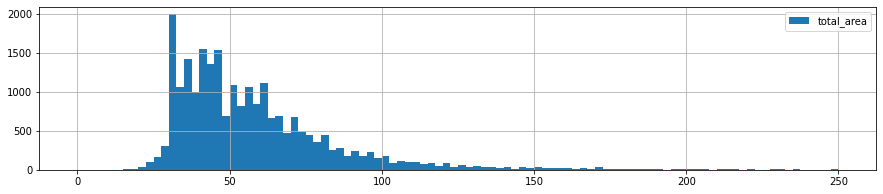

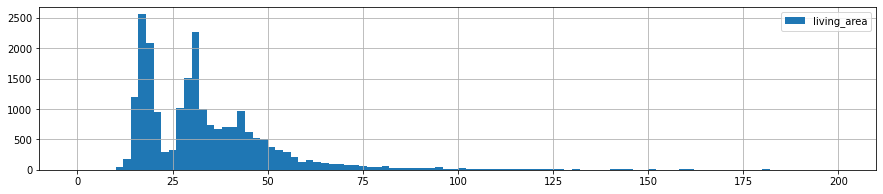

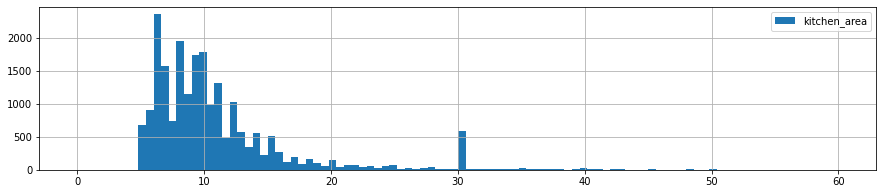

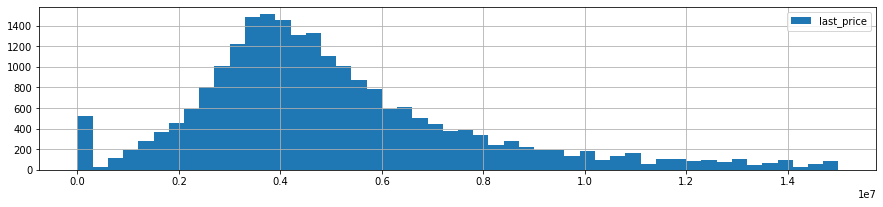

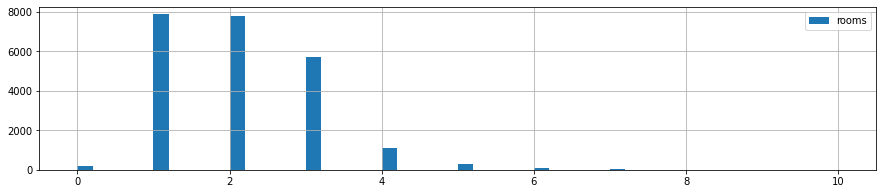

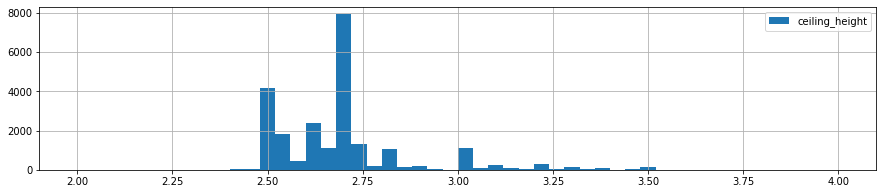

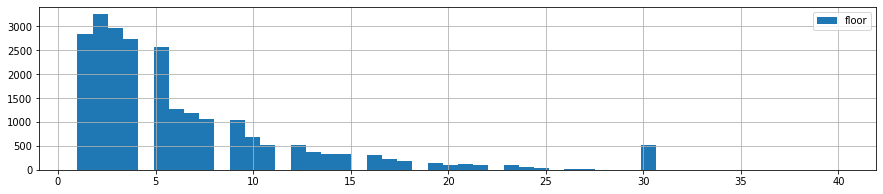

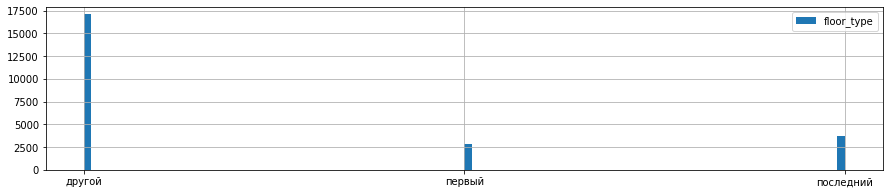

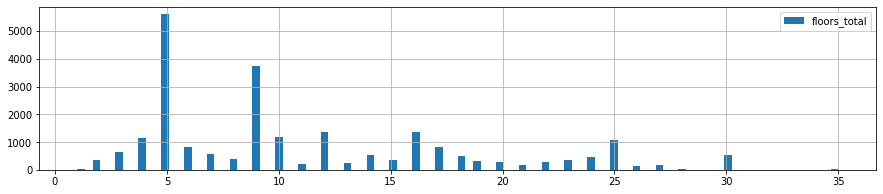

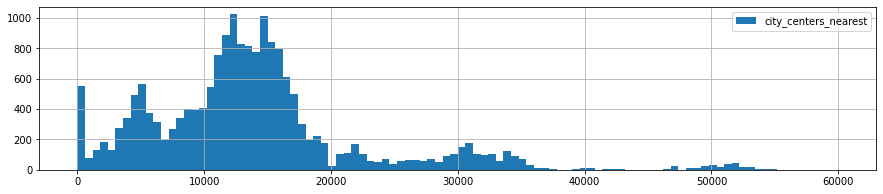

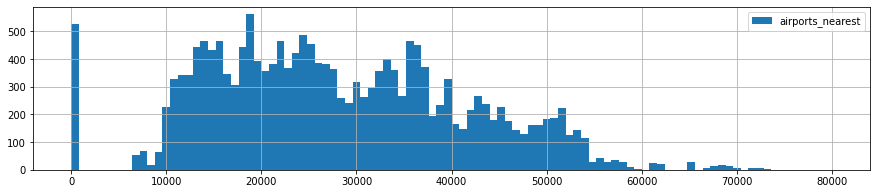

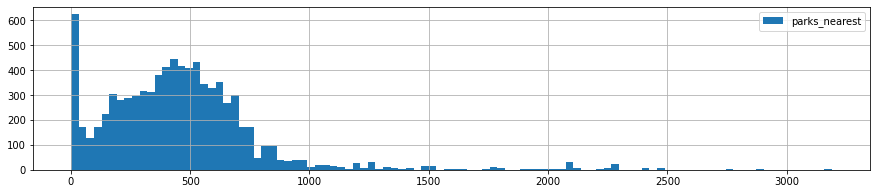

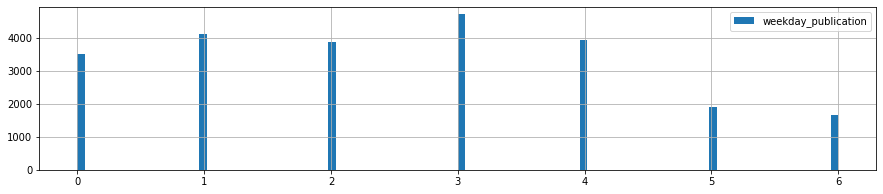

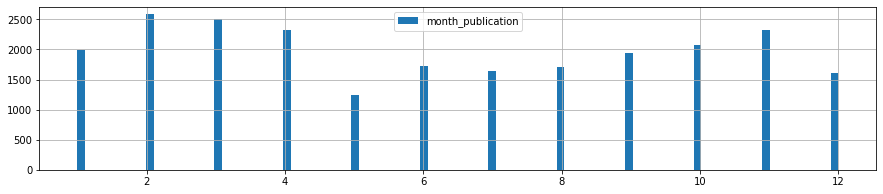

In [ ]:
import matplotlib.pyplot as plt
data['total_area'].hist(bins = 100, range = (0, 250), legend = True, figsize=(15, 3))
plt.show()
data['living_area'].hist(bins = 100, range = (0, 200), legend = True, figsize=(15, 3))
plt.show()
data['kitchen_area'].hist(bins = 100, range = (0, 60), legend = True, figsize=(15, 3))
plt.show()
data['last_price'].hist(bins = 50, range = (0, 15000000), legend = True, figsize=(15, 3))
plt.show()
data['rooms'].hist(bins = 50, range = (0, 10), legend = True, figsize=(15, 3))
plt.show()
data['ceiling_height'].hist(bins = 50, range = (2, 4), legend = True, figsize=(15, 3))
plt.show()
data['floor'].hist(bins = 50, range = (1, 40), legend = True, figsize=(15, 3))
plt.show()
data['floor_type'].hist(bins = 100, legend = True, figsize=(15, 3))
plt.show()
data['floors_total'].hist(bins = 100, range = (1, 35), legend = True, figsize=(15, 3))
plt.show()
data['city_centers_nearest'].hist(bins = 100, range = (0, 60000), legend = True, figsize=(15, 3))
plt.show()
data['airports_nearest'].hist(bins = 100, range = (0, 80000), legend = True, figsize=(15, 3))
plt.show()
data['parks_nearest'].hist(bins = 100, legend = True, figsize=(15, 3))
plt.show()
data['weekday_publication'].hist(bins = 100, legend = True, figsize=(15, 3))
plt.show()
data['month_publication'].hist(bins = 100, legend = True, figsize=(15, 3))
plt.show()

**Выводы:**  
1. Основная часть продаваемых квартир по общей площади лежит в дианазоне: 30 - 70 м2;  
2. Основная часть продаваемых квартир по жилой площади лежит в дианазоне: 10 - 40 м2;  
3. Основная часть продаваемых квартир по площади кухни лежит в дианазоне: 5 - 12 м2;  
4. Большая часть квартир продается в диапазоне 3-5 млн;
5. Основная масса продаваемых квартир 1, 2 и 3 комнатные. При чем количество 1к примерно равно 2к, а 3к ориентировочно в 2.5 раза меньше, чем  сумма 1к и 2к;
6. Основная масса квартир продается с высотой потолков от 2,5 до 2,75 с преймуществом в 2,5 м;
7. В основной массе квартиры продают на этажах с 1 по 5;
8. На первых и последних этажах продают меньше всего квартир;
9. Преймущественно продаются квартиры в 5 и 9 этажных домах;
10. У большинства продаваемых квартир растояние до центра 10-15 км;
11. Большинство продавцов квартир не акцентируют внимание на расстояние до аэропорта;
12. Большинство продавцов квартир не акцентируют внимание на расстояние до парка, большинство продаваемых квартир находится на расстоянии в 500 м;  
13. Ожидаемо больше публикаций с понедельника по пятницу.  
14. В январе и мае меньше всего публикуют объявлений. Наибольшее количество публикаций в феврале, марте, апреле и ноябре.

count    20566.000000
mean       176.178012
std        217.600408
min          1.000000
25%         41.000000
50%         91.000000
75%        223.000000
max       1580.000000
Name: days_exposition, dtype: float64


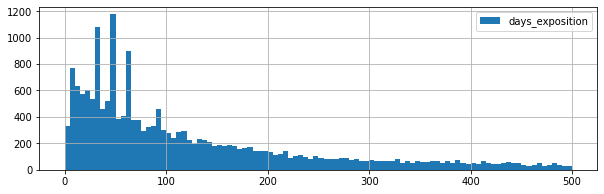

In [ ]:
# изучаем days_exposition
data['days_exposition'].hist(bins = 100, range = (0, 500), legend = True, figsize=(10, 3))
print(data['days_exposition'].describe())

**Вывод:**  
Самая быстрая продажа происходила через 1 день после размещения объявления.  
При этом быстрыми продажами можно считать квартиры, которые продаются не позднее 42 дня с момента размещения.  
Медленными продажами считаются квартиры, которые продаются после 224 дня с момента размещения.  
Обычно квартиры продаются за 91 день.

0.6365374329646258

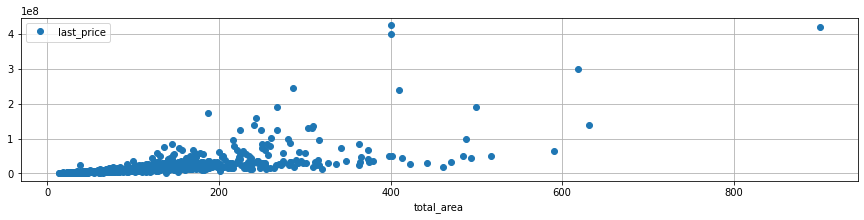

In [ ]:
# изучаем какие факторы влияют на полную стоимость квартир
# зависимость общей площади от общей стоимости
pivot_last_price_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = 'median')
pivot_last_price_total_area.plot(style = 'o', grid = True, figsize =(15,3), legend = True)
data['total_area'].corr(data['last_price'])

Коэффициент Пирсона = 0.63, что говорит о наличии связи, но не очень сильной.

0.5393558504016375

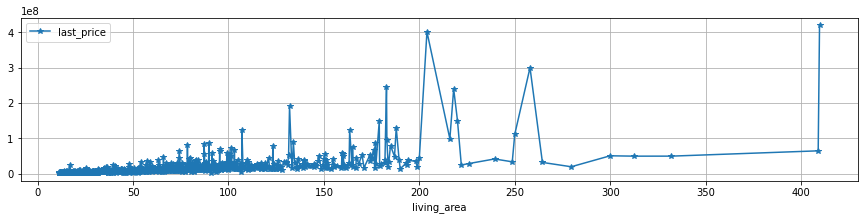

In [ ]:
# общей стоимости от жилой площади
pivot_last_price_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = 'median')
pivot_last_price_living_area.plot(style = '*-', grid = True, figsize =(15,3), legend = True)
data['living_area'].corr(data['last_price'])

Коэффициент Пирсона = 0.53, что говорит о наличии связи, но не очень сильной.

0.4013459375584344

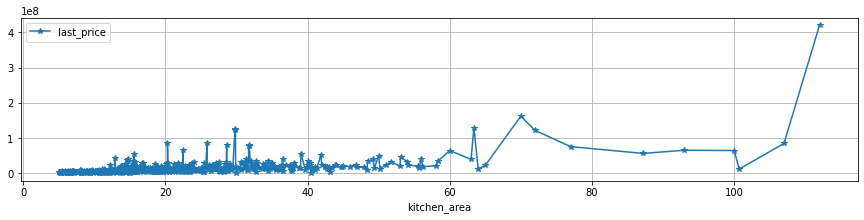

In [ ]:
# общей стоимости от площади кухни
pivot_last_price_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = 'median')
pivot_last_price_kitchen_area.plot(style = '*-', grid = True, figsize =(15,3), legend = True)
data['kitchen_area'].corr(data['last_price'])

Коэффициент Пирсона = 0.40, что говорит о наличии связи, но не очень сильной.

-0.0025073397223408242

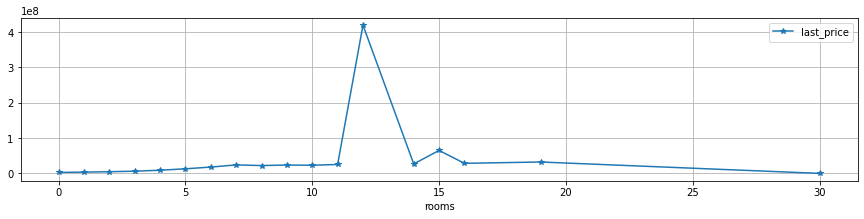

In [ ]:
# общей стоимости от количества комнат
pivot_last_price_price_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')
pivot_last_price_price_rooms.plot(style = '*-', grid = True, figsize =(15,3), legend = True)
data['rooms'].corr(data['last_price'])

Коэффициент Пирсона = 0, что говорит о полном отсутствии связи.

<AxesSubplot:xlabel='floor_type'>

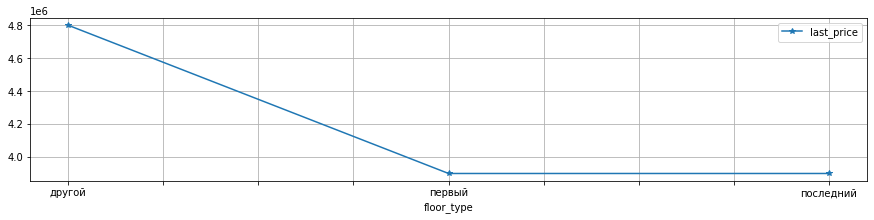

In [ ]:
# общей стоимости от этажа
pivot_last_price_floor_type = data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'median')
pivot_last_price_floor_type.plot(style = '*-', grid = True, figsize =(15,3), legend = True)

По графику видна прямая взаимосвязь цены с этажом. На первом и последнем цены ниже.

<AxesSubplot:xlabel='weekday_publication'>

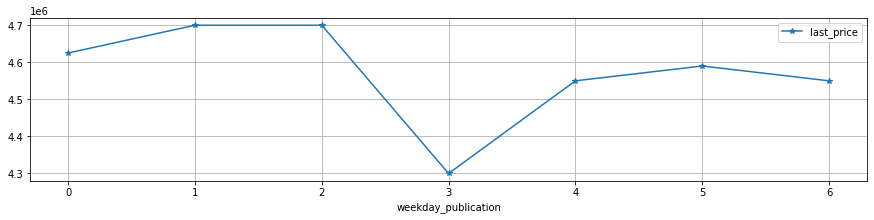

In [ ]:
# общей стоимости от дня недели
pivot_last_price_weekday = data.pivot_table(index = 'weekday_publication', values = 'last_price', aggfunc = 'median')
pivot_last_price_weekday.plot(style = '*-', grid = True, figsize =(15,3), legend = True)

Самый высокие цены на недвижимость во вторник и среду

<AxesSubplot:xlabel='month_publication'>

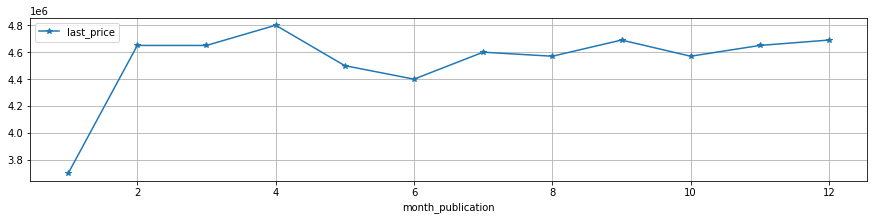

In [ ]:
# общей стоимости от месяца
pivot_last_price_month = data.pivot_table(index = 'month_publication', values = 'last_price', aggfunc = 'median')
pivot_last_price_month.plot(style = '*-', grid = True, figsize =(15,3), legend = True)

Самая высокая стоимость недвижимости в апреле, самая низкая в июне. Присутствует сезонность предложения.

<AxesSubplot:xlabel='year_publication'>

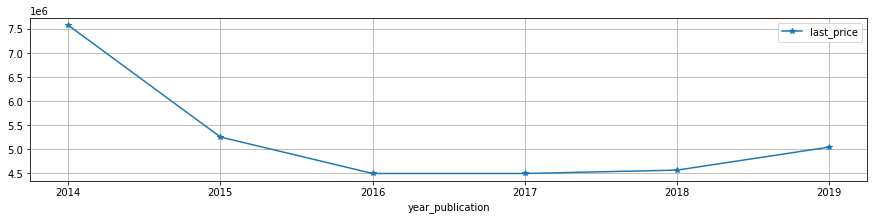

In [ ]:
# общей стоимости от года
data = data[data['year_publication'] != 1970]
pivot_last_price_year = data.pivot_table(index = 'year_publication', values = 'last_price', aggfunc = 'median')
pivot_last_price_year.plot(style = '*-', grid = True, figsize =(15,3), legend = True)

Пик цен на квартиры приходился на 2014 год, далее до 2016 года было снижение, затем до 2018 года стабилизация, после 2018 года незначительный рост.

In [ ]:
# средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
average_price_m2 = data.pivot_table(index = 'locality_name_short', values = 'price_m2', aggfunc = ['count', 'median'])
average_price_m2.columns = ['count', 'median']
print(average_price_m2.sort_values(by = 'count', ascending = False).round().head(10).reset_index())

  locality_name_short  count    median
0     Санкт-Петербург  15342  104535.0
1              Мурино    578   86059.0
2             Кудрово    470   95791.0
3              Шушары    436   76748.0
4          Всеволожск    395   65789.0
5              Пушкин    360   99994.0
6             Колпино    338   74724.0
7           Парголово    326   91580.0
8             Гатчина    300   67936.0
9              Выборг    228   58233.0


In [ ]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_short,price_m2,weekday_publication,month_publication,year_publication,floor_type,city_сenters_nearest_km
0,20.0,13000000.0,108.00,2019-03-07,3.0,2.70,16.0,51.0,8.0,0.0,...,2.0,755.0,NaN,Санкт-Петербург,120370.370370,3,3,2019,другой,16.0
1,7.0,3350000.0,40.40,2018-12-04,1.0,2.63,11.0,18.6,1.0,0.0,...,0.0,NaN,81.0,Шушары,82920.792079,1,12,2018,первый,19.0
2,10.0,5196000.0,56.00,2015-08-20,2.0,2.70,5.0,34.3,4.0,0.0,...,2.0,574.0,558.0,Санкт-Петербург,92785.714286,3,8,2015,другой,14.0
3,0.0,64900000.0,159.00,2015-07-24,3.0,2.70,14.0,NaN,9.0,0.0,...,3.0,234.0,424.0,Санкт-Петербург,408176.100629,4,7,2015,другой,7.0
4,2.0,10000000.0,100.00,2018-06-19,2.0,3.03,14.0,32.0,13.0,0.0,...,1.0,48.0,121.0,Санкт-Петербург,100000.000000,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9.0,4600000.0,62.40,2016-08-05,3.0,2.60,9.0,40.0,8.0,0.0,...,1.0,675.0,239.0,Петергоф,73717.948718,4,8,2016,другой,34.0
23695,14.0,3100000.0,59.00,2018-01-15,3.0,2.50,5.0,38.0,4.0,0.0,...,0.0,NaN,45.0,Тосно,52542.372881,0,1,2018,другой,0.0
23696,18.0,2500000.0,56.70,2018-02-11,2.0,2.70,3.0,29.7,1.0,0.0,...,0.0,NaN,NaN,Рождествено,44091.710758,6,2,2018,первый,0.0
23697,13.0,11475000.0,76.75,2017-03-28,2.0,3.00,17.0,NaN,12.0,0.0,...,3.0,196.0,602.0,Санкт-Петербург,149511.400651,1,3,2017,другой,10.0


                              price_m2
city_сenters_nearest_km               
1.0                      125565.610860
2.0                      119531.250000
3.0                      108000.000000
4.0                      117391.304348
5.0                      126930.052401


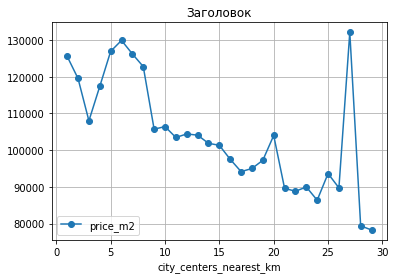

In [ ]:
data['city_сenters_nearest_km'] = data['city_сenters_nearest_km'].fillna(value=0) # переименовываем пропущенные значения на not_defined
distance_price = data.query('locality_name_short == "Санкт-Петербург"')
# выполняем срез по С-Петербургу, исключаем пропущенные згачения и строим график:
distance_price = distance_price.query('locality_name_short == "Санкт-Петербург"' and 'city_сenters_nearest_km != 0' and 'city_сenters_nearest_km != 0')#.pivot_table(index = 'city_сenters_nearest_km', values = 'price_m2', aggfunc = 'median')
pivot_distance_price = distance_price.pivot_table(index = 'city_сenters_nearest_km', values = 'price_m2', aggfunc = 'median')
pivot_distance_price.plot(grid = True, style = 'o-', title = 'Заголовок')

print(pivot_distance_price.head())


Ожидаемо медианная стоимость за м2 при отдалении от центра уменьшается

### Общий вывод

**Вывод:**  
Мы проанализировали статистику по продажам недвижимости.  
В исследовании приняли участие следующие параметры: площадь недвижимости, цена, количество комнат, высоту потолков, этаж квартиры, общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления.  
Следствием исследования выявлены следующие закономерности:
1. Выгодно с точки зрения цены покупать в июне, в пятницу или воскресенье, на первом или последнем этаже, предпочтительнодальше 20 км от центра.  
2. Максимально невыгодно приобретать недвижимость в апреле во вторник.  
3. Медианная стоимость недвижимости с 2014 года по 2016 год снизилась на 40%. При этом виден рост на 10% с 2018 по 2019 г.